# Funnel Decomposition Analysis - Dynamic Dimension Column Names

This notebook demonstrates the system's **complete flexibility with dimension column names**:

## How It Works

The entire codebase is now **dynamic** and reads dimension column names from `dimension_config.py`:

```python
# In src/dimension_config.py:
DIMENSION_COLUMNS = [
    'credit_score_band',     # Your credit score column name
    'competitiveness_tier',  # Your competitiveness column name  
    'product_type'           # Your product column name
]
```

**No code changes needed** - just update the config file!

## This Demo

Our CSV uses alternative column names:
- `credit_score_band` (instead of `fico_bands`)
- `competitiveness_tier` (instead of `offer_comp_tier`)
- `product_type` (instead of `prod_line`)

Since these are configured in `dimension_config.py`, the system **automatically**:
- Validates using these column names
- Calculates effects using these column names
- Creates visualizations with proper labels
- Displays these names in all outputs

## Alternative Dimension Values

The data also uses alternative dimension values:
- **Lenders**: BANK_A, BANK_B, BANK_C, CREDIT_UNION_1, FINTECH_CO
- **Credit scores**: Excellent, Good, Fair, Poor
- **Competitiveness**: exclusive, competitive, standard
- **Products**: auto_loan, personal_loan

## Key Insight

**No column renaming required!** The system works directly with your column names.

To use different column names:
1. Update `DIMENSION_COLUMNS` in `src/dimension_config.py`
2. That's it - all code automatically adapts!

## Setup

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import symmetric_decomposition_calculator
import visualization_engine
import dimension_config

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['figure.dpi'] = 100

## Check Dimension Configuration

Let's verify what dimension column names are configured:

In [2]:
print("Configured Dimension Column Names:")
dimension_cols = dimension_config.get_dimension_columns()
for i, col in enumerate(dimension_cols, 1):
    print(f"  {i}. {col}")

print("\nDimension Value Orderings:")
for dim in dimension_cols:
    order = dimension_config.get_dimension_order(dim)
    print(f"\n{dim}:")
    print(f"  {order}")

Configured Dimension Column Names:
  1. credit_score_band
  2. competitiveness_tier
  3. product_type

Dimension Value Orderings:

credit_score_band:
  ['High_FICO', 'Medium_FICO', 'Low_FICO', 'Null_FICO', 'Excellent', 'Good', 'Fair', 'Poor']

competitiveness_tier:
  ['solo_offer', 'multi_best', 'multi_other', 'exclusive', 'competitive', 'standard']

product_type:
  ['used', 'vmax', 'auto_loan', 'personal_loan']


## Load Data with Alternative Column Names

Our CSV has the alternative column names matching the config:

In [3]:
# Load data with ALTERNATIVE column names (no mapping needed!)
data_path = Path.cwd().parent / 'data' / 'funnel_data_alternative_dims.csv'
df_monthly = pd.read_csv(data_path)
df_monthly['month_begin_date'] = pd.to_datetime(df_monthly['month_begin_date'])

print("Data Column Names:")
print(df_monthly.columns.tolist())

print(f"\nLoaded {len(df_monthly):,} rows")

print("\nDimension values in data:")
print(f"  Lenders: {', '.join(sorted(df_monthly['lender'].unique()))}")
for dim_col in dimension_cols:
    print(f"  {dim_col}: {', '.join(sorted(df_monthly[dim_col].unique()))}")

print(f"\nDate range: {df_monthly['month_begin_date'].min().date()} to {df_monthly['month_begin_date'].max().date()}")

print("\nSample data:")
df_monthly.head(3)

Data Column Names:
['lender', 'month_begin_date', 'credit_score_band', 'competitiveness_tier', 'product_type', 'num_tot_bks', 'num_tot_apps', 'pct_of_total_apps', 'str_apprv_rate', 'str_bk_rate', 'cond_apprv_rate', 'cond_bk_rate']

Loaded 2,880 rows

Dimension values in data:
  Lenders: BANK_A, BANK_B, BANK_C, CREDIT_UNION_1, FINTECH_CO
  credit_score_band: Excellent, Fair, Good, Poor
  competitiveness_tier: competitive, exclusive, standard
  product_type: auto_loan, personal_loan

Date range: 2023-01-01 to 2024-12-01

Sample data:


,lender,month_begin_date,credit_score_band,competitiveness_tier,product_type,num_tot_bks,num_tot_apps,pct_of_total_apps,str_apprv_rate,str_bk_rate,cond_apprv_rate,cond_bk_rate
0,BANK_A,2023-01-01,Excellent,exclusive,auto_loan,6655,17270,0.041667,0.622488,0.673693,0.275772,0.568423
1,BANK_A,2023-01-01,Excellent,exclusive,personal_loan,6655,17270,0.041667,0.604159,0.549452,0.243793,0.475360
2,BANK_A,2023-01-01,Excellent,competitive,auto_loan,6655,17270,0.041667,0.669629,0.553992,0.203541,0.442024


## Symmetric Decomposition

Run decomposition - the calculator automatically uses the configured dimension column names:

In [4]:
# Calculate symmetric decomposition for June 2023 → June 2024
results_sym = symmetric_decomposition_calculator.calculate_decomposition(
    df=df_monthly,
    date_a='2023-06-01',
    date_b='2024-06-01',
    lender='BANK_A'
)

print("Symmetric Decomposition Results:")
print(f"  Method: {results_sym.metadata['method']}")
print(f"  Lender: {results_sym.metadata['lender']}")
print(f"  Period 1: {results_sym.metadata['date_a']}")
print(f"  Period 2: {results_sym.metadata['date_b']}")
print(f"  Period 1 bookings: {results_sym.metadata['period_1_total_bookings']:,.0f}")
print(f"  Period 2 bookings: {results_sym.metadata['period_2_total_bookings']:,.0f}")
print(f"  Delta bookings: {results_sym.metadata['delta_total_bookings']:+,.0f}")
print(f"  Number of segments: {results_sym.metadata['num_segments']}")

Symmetric Decomposition Results:
  Method: symmetric
  Lender: BANK_A
  Period 1: 2023-06-01
  Period 2: 2024-06-01
  Period 1 bookings: 6,843
  Period 2 bookings: 6,414
  Delta bookings: -429
  Number of segments: 24


/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: -428.88, Actual change: -429.00
  warnings.warn(


In [5]:
# View summary
print("Decomposition Summary:")
results_sym.summary

Decomposition Summary:


,effect_type,booking_impact
0,volume_effect,-237.703986
1,mix_effect,0.000000
2,str_approval_effect,-206.249554
3,cond_approval_effect,-75.062603
4,str_booking_effect,152.156723
5,cond_booking_effect,-62.200112
6,interaction_effect,0.178728
7,total_change,-428.880804


## Segment Detail with Alternative Column Names

Notice the segment detail uses the alternative column names directly:

In [6]:
# Show segment detail - notice the column names!
print("Segment Detail Column Names:")
print([col for col in results_sym.segment_detail.columns[:10]])

print("\nFirst few segments:")
results_sym.segment_detail[[dimension_cols[0], dimension_cols[1], dimension_cols[2],
                            'period_1_segment_bookings', 'period_2_segment_bookings',
                            'total_effect']].head(8)

Segment Detail Column Names:
['credit_score_band', 'competitiveness_tier', 'product_type', 'period_1_date', 'period_1_total_apps', 'period_1_pct_of_total', 'period_1_segment_apps', 'period_1_str_apprv_rate', 'period_1_str_bk_rate', 'period_1_cond_apprv_rate']

First few segments:


,credit_score_band,competitiveness_tier,product_type,period_1_segment_bookings,period_2_segment_bookings,total_effect
0,Excellent,exclusive,auto_loan,393.531982,384.027064,-9.504918
1,Excellent,exclusive,personal_loan,364.037880,376.646381,12.608501
2,Excellent,competitive,auto_loan,342.904032,391.835959,48.931927
3,Excellent,competitive,personal_loan,362.742482,283.656220,-79.086262
4,Excellent,standard,auto_loan,292.838989,303.936157,11.097167
5,Excellent,standard,personal_loan,244.178452,201.561864,-42.616588
6,Good,exclusive,auto_loan,388.205556,398.319508,10.113952
7,Good,exclusive,personal_loan,283.095832,369.483534,86.387703


## Waterfall Grid Visualization

Charts automatically use the alternative dimension names in titles and labels:

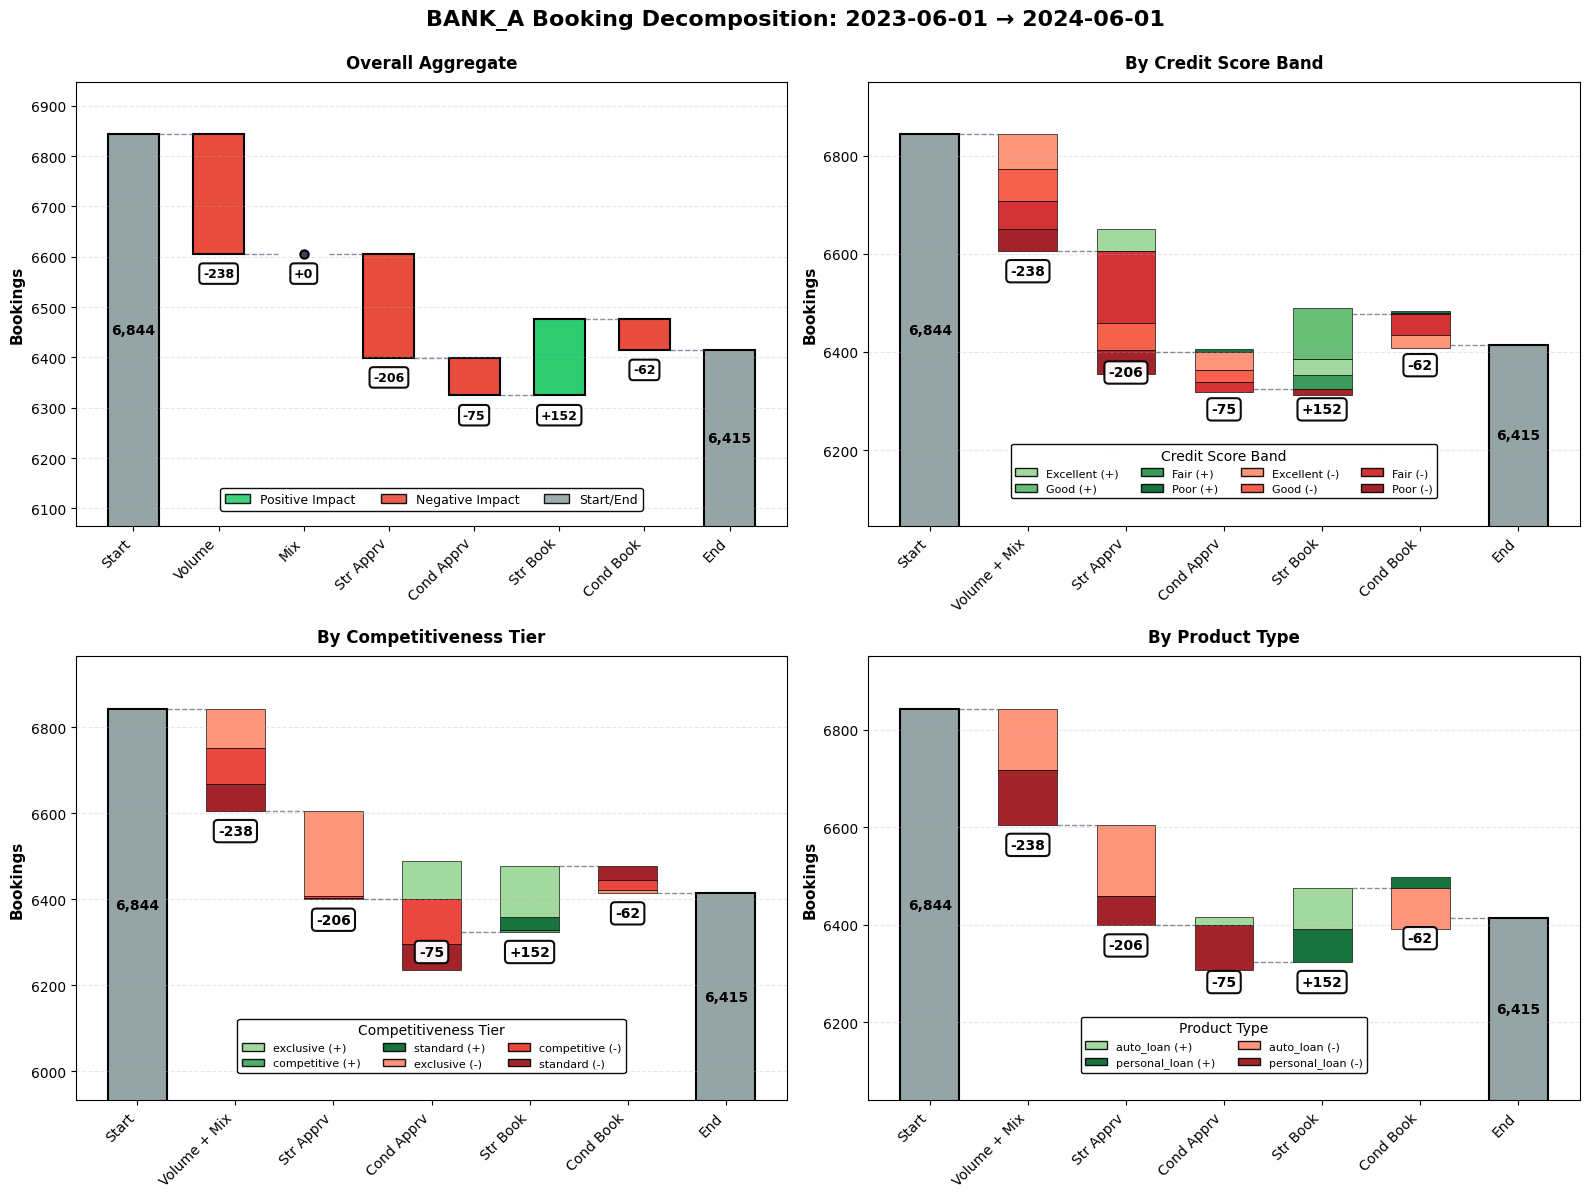

In [7]:
# Create waterfall grid - titles will show formatted dimension names
fig_sym = visualization_engine.create_waterfall_grid(
    summary=results_sym.summary,
    segment_detail=results_sym.segment_detail,
    lender='BANK_A'
)

plt.show()

## Dimension Drilldowns

Drilldown charts also use the alternative dimension names:


Creating drilldown for: credit_score_band


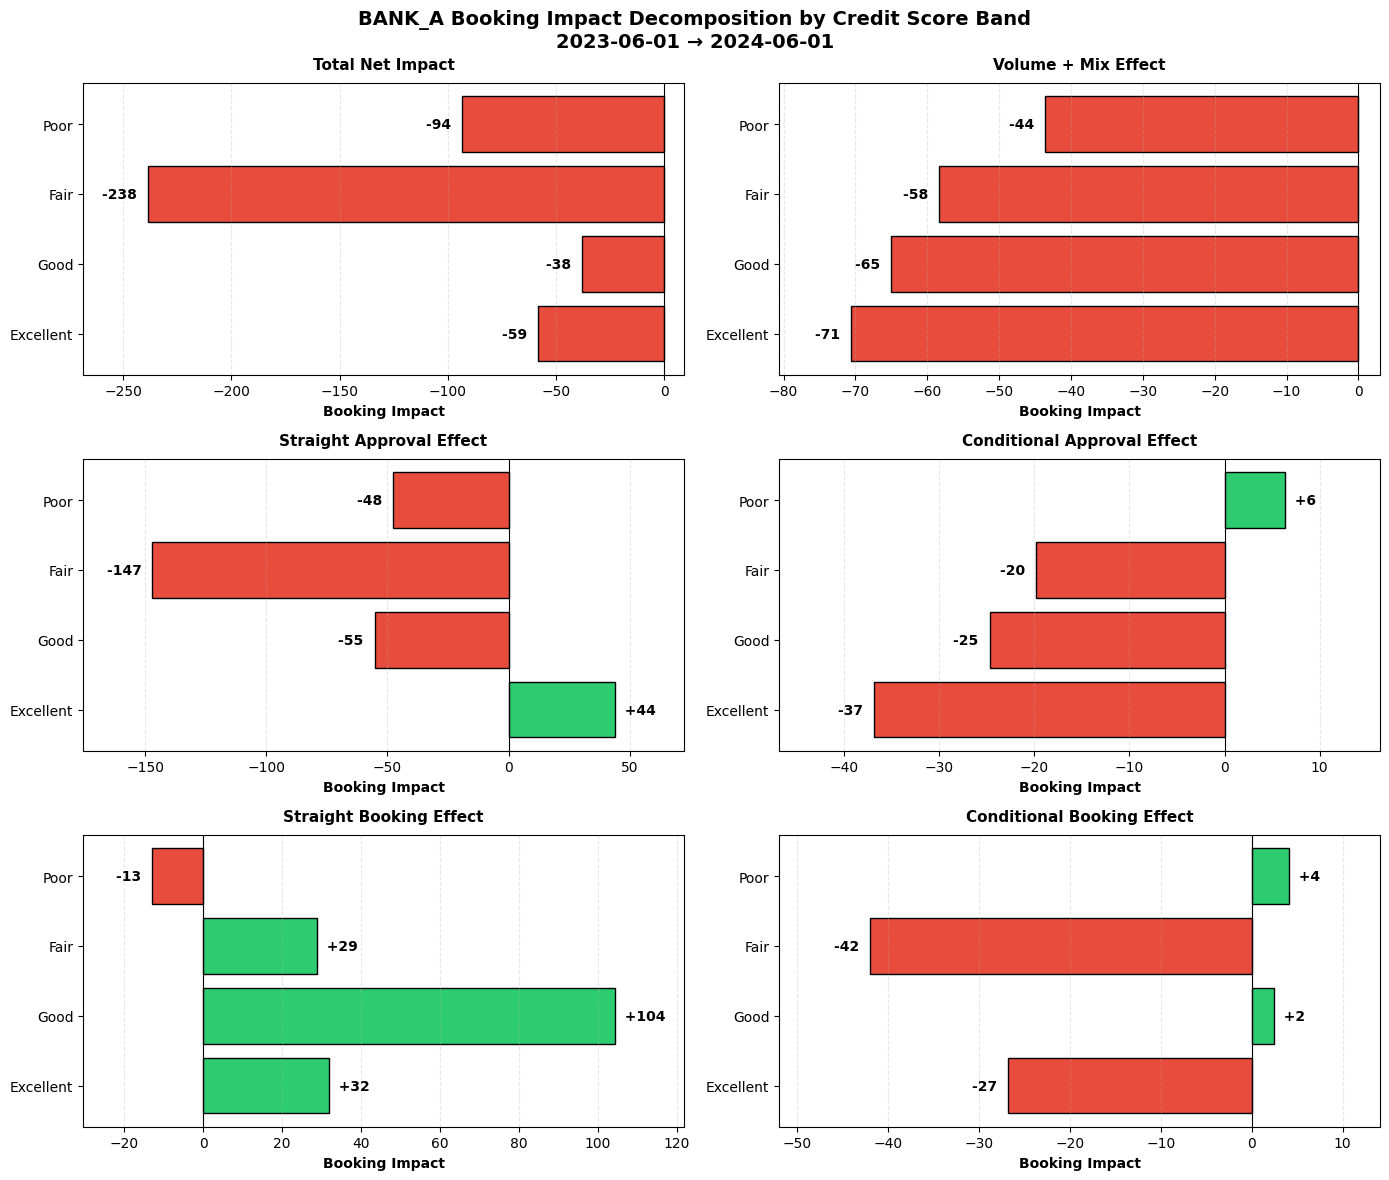


Creating drilldown for: competitiveness_tier


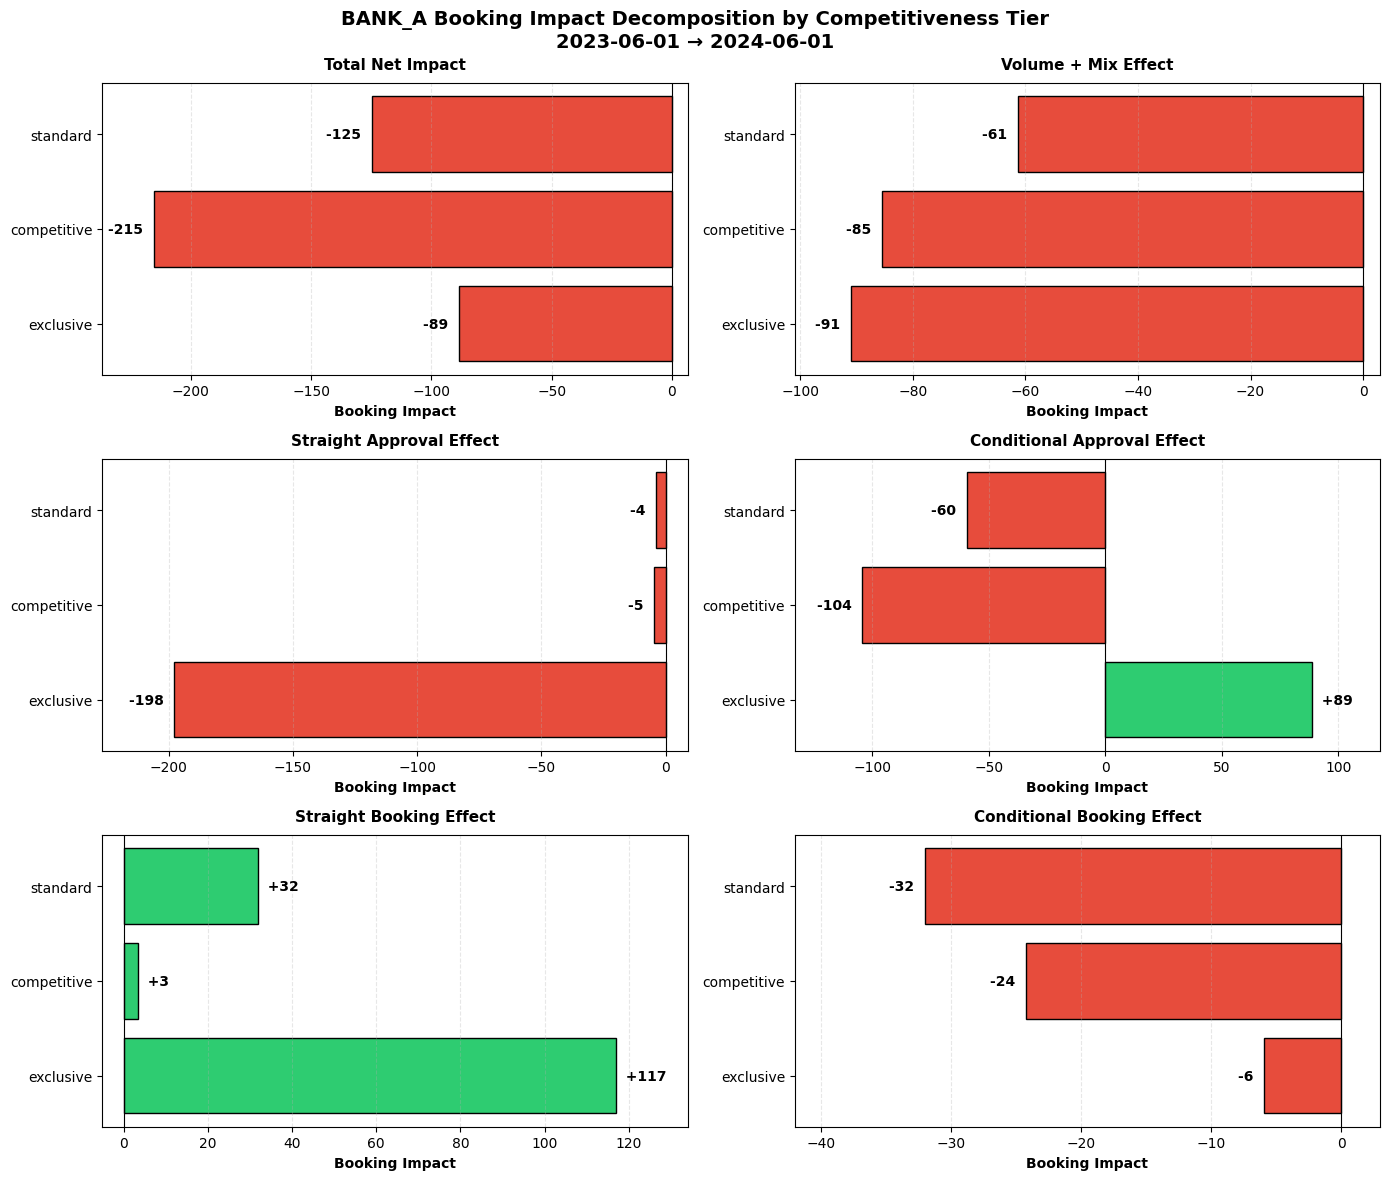


Creating drilldown for: product_type


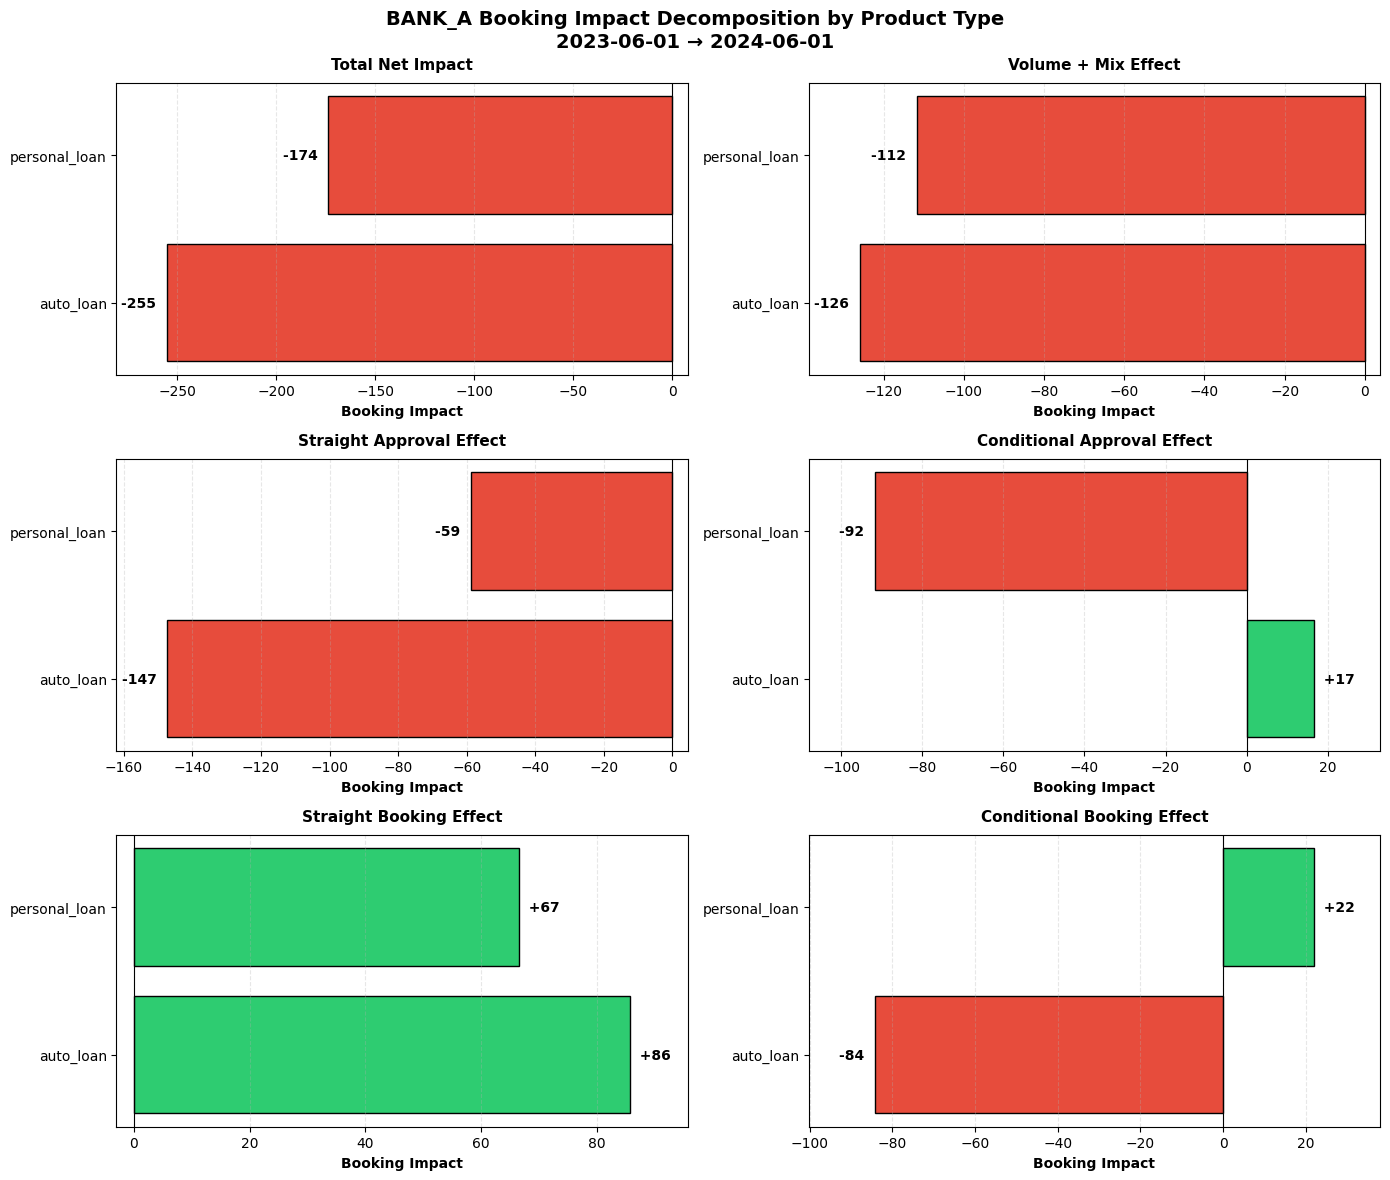

In [8]:
# Create dimension drilldowns - one for each configured dimension
for dim_col in dimension_cols:
    print(f"\nCreating drilldown for: {dim_col}")
    fig = visualization_engine.create_dimension_drilldown(
        segment_detail=results_sym.segment_detail,
        dimension=dim_col,
        lender='BANK_A'
    )
    plt.show()

## Multi-Lender Analysis

Multi-lender decomposition also works with alternative dimension names:

In [9]:
# Calculate multi-lender decomposition
results_multi = symmetric_decomposition_calculator.calculate_multi_lender_decomposition(
    df=df_monthly,
    date_a='2023-06-01',
    date_b='2024-06-01',
    lenders=['BANK_A', 'BANK_B', 'CREDIT_UNION_1']
)

print("Multi-Lender Results:")
print(f"  Lenders: {results_multi.metadata['lenders']}")
print(f"  Aggregate delta: {results_multi.metadata['aggregate_delta_bookings']:+,.0f}")

print("\nAggregate Summary:")
results_multi.aggregate_summary

Calculating decomposition for BANK_A...
Calculating decomposition for BANK_B...
Calculating decomposition for CREDIT_UNION_1...
Multi-Lender Results:
  Lenders: ['BANK_A', 'BANK_B', 'CREDIT_UNION_1']
  Aggregate delta: -3,457

Aggregate Summary:


/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: -428.88, Actual change: -429.00
  warnings.warn(
/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: -2103.12, Actual change: -2104.00
  warnings.warn(
/home/granty1231/funnel_decomposition/src/symmetric_decomposition_calculator.py:417: UserWarning: Aggregate reconciliation difference detected. Total effect: -923.77, Actual change: -924.00
  warnings.warn(


,effect_type,booking_impact
0,volume_effect,-3395.032795
1,mix_effect,0.000000
2,str_approval_effect,-241.581096
3,cond_approval_effect,-175.260578
4,str_booking_effect,346.166283
5,cond_booking_effect,13.696241
6,interaction_effect,-3.754876
7,total_change,-3455.766821


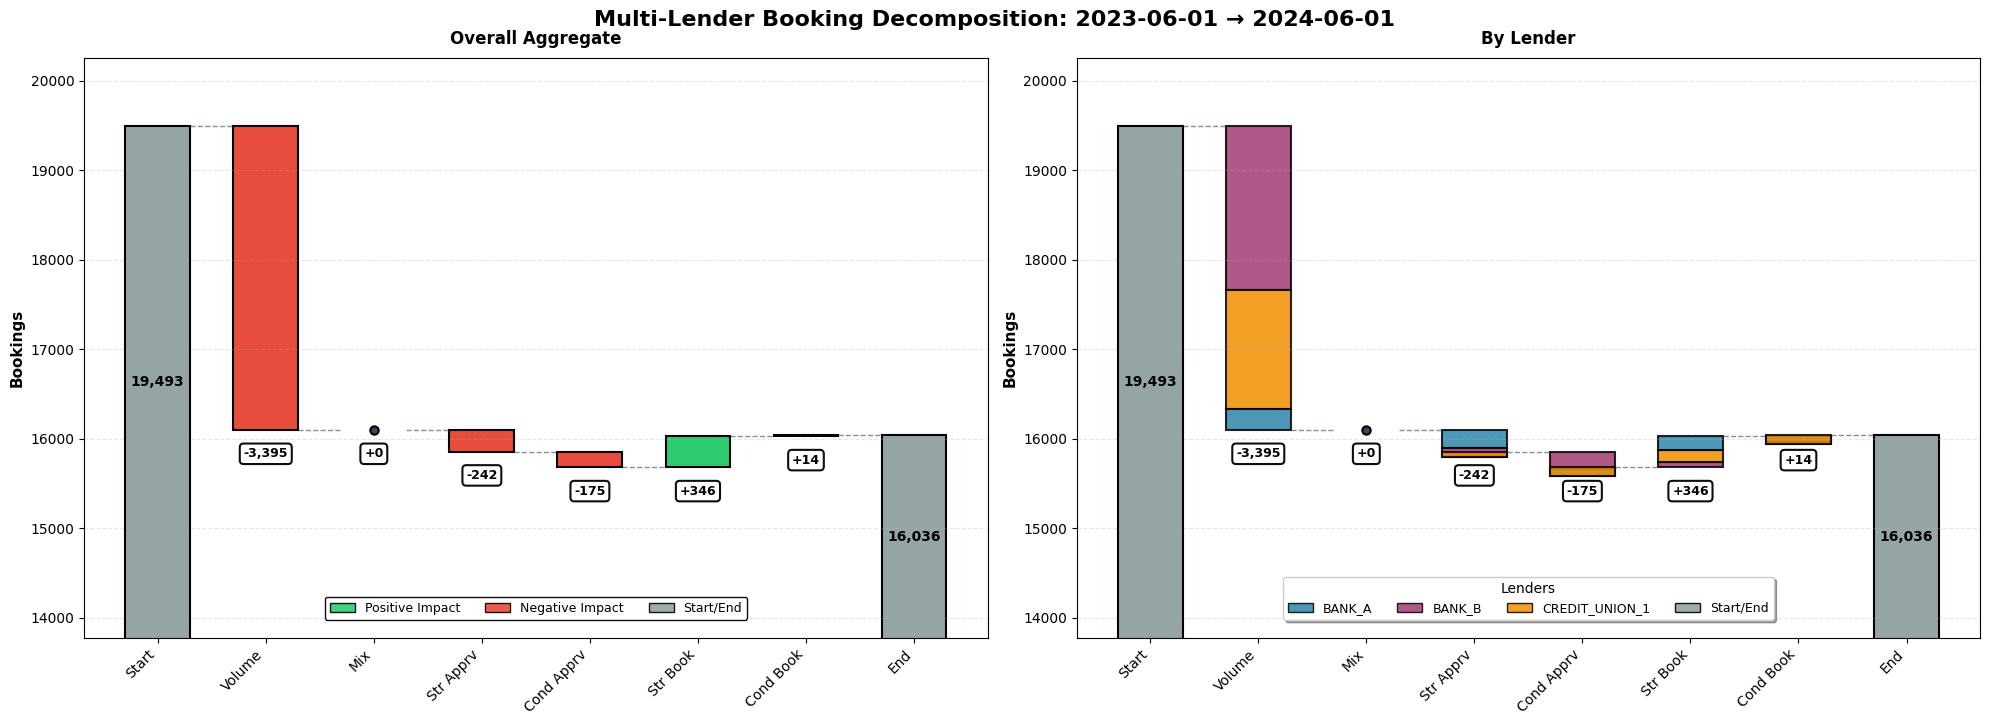

In [10]:
# Create multi-lender waterfall
fig_multi = visualization_engine.create_lender_waterfall_grid(
    lender_summaries=results_multi.lender_summaries,
    aggregate_summary=results_multi.aggregate_summary,
    metadata=results_multi.metadata
)

plt.show()

---

# Summary

## What We Demonstrated

### 1. **Fully Dynamic Dimension Columns**
- The codebase reads dimension column names from `dimension_config.py`
- No hardcoded column names anywhere in calculators or visualizations
- All code automatically adapts to configured names

### 2. **Zero Code Changes Required**
- Change column names by updating one line in `dimension_config.py`:
  ```python
  DIMENSION_COLUMNS = ['your_col_1', 'your_col_2', 'your_col_3']
  ```
- No need to touch calculators, validators, or visualization code

### 3. **Automatic Label Formatting**
- Column names like `credit_score_band` automatically become "Credit Score Band" in charts
- Column names like `competitiveness_tier` become "Competitiveness Tier"
- Underscores removed, proper title casing applied

### 4. **Complete System Integration**
All components work with dynamic dimensions:
- ✅ Data validation (`utils.py`)
- ✅ Decomposition calculations (`symmetric_decomposition_calculator.py`)
- ✅ Waterfall visualizations (`visualization_engine.py`)
- ✅ Dimension drilldowns
- ✅ Multi-lender analysis
- ✅ Segment detail outputs

## Real-World Use Cases

This flexibility is perfect for:
1. **Different organizations** with their own column naming standards
2. **Legacy systems** that can't change column names
3. **International teams** using different terminology
4. **Multiple data sources** with varying schemas
5. **Evolving requirements** where dimensions change over time

## How to Adapt for Your Data

```python
# Step 1: Open src/dimension_config.py

# Step 2: Update DIMENSION_COLUMNS to match your data:
DIMENSION_COLUMNS = [
    'your_credit_score_column',
    'your_competitiveness_column',
    'your_product_column'
]

# Step 3: Update DIMENSION_ORDER with your column names and values:
DIMENSION_ORDER = {
    'your_credit_score_column': ['Premium', 'Standard', 'Subprime'],
    'your_competitiveness_column': ['Best', 'Match', 'Worse'],
    'your_product_column': ['Product_A', 'Product_B']
}

# Step 4: Run your analysis - everything works automatically!
```

## Success!

✅ Dynamic dimension column names working  
✅ No column mapping required  
✅ Automatic label formatting  
✅ All visualizations adapting correctly  
✅ Multi-lender analysis functional  
✅ Complete system integration verified  